In [1]:
# installing packages
# !pip install pycaret
# !pip install --upgrade pip
#!pip install streamlit

In [2]:
import pandas as pd
import numpy as np

In [3]:
from pycaret.classification import *

In [4]:
#loading the data
hr_data = pd.read_csv("../data/HR.csv")

In [5]:
hr_data.shape

(14999, 10)

In [6]:
hr_data.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
#checking the data types
hr_data.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
dept                      object
salary                    object
dtype: object

In [8]:
#check if there any  missing values
hr_data.isnull().any()

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
dept                     False
salary                   False
dtype: bool

In [9]:
# creating the unseen data/hold out dataset

data = hr_data.sample(frac=0.95, random_state=786)
data_unseen = hr_data.drop(data.index)

data.reset_index(inplace=True, drop=True)
data_unseen.reset_index(inplace=True, drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions ' + str(data_unseen.shape))

data_unseen.to_csv("../data/HR_test_data.csv", index = False)
data.to_csv("../data/HR_training_data.csv",index = False)


Data for Modeling: (14249, 10)
Unseen Data For Predictions (750, 10)


In [10]:
#initializing pycaret environment
exp_clf101 = setup(data = data, target = 'left', session_id=123)

,Description,Value
0,session_id,123
1,Target,left
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(14249, 10)"
5,Missing Values,False
6,Numeric Features,3
7,Categorical Features,6
8,Ordinal Features,False
9,High Cardinality Features,False


In [11]:
#comparing models
best_model = compare_models(n_select=3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9875,0.9905,0.9583,0.9882,0.9730,0.9648,0.9651,0.2900
lightgbm,Light Gradient Boosting Machine,0.9847,0.9925,0.9520,0.9825,0.9669,0.9570,0.9572,0.0890
et,Extra Trees Classifier,0.9816,0.9893,0.9541,0.9675,0.9606,0.9486,0.9487,0.2400
gbc,Gradient Boosting Classifier,0.9757,0.9866,0.9239,0.9719,0.9472,0.9315,0.9321,0.4070
dt,Decision Tree Classifier,0.9753,0.9712,0.9634,0.9342,0.9485,0.9323,0.9326,0.0440
ada,Ada Boost Classifier,0.9567,0.9821,0.9043,0.9115,0.9077,0.8794,0.8796,0.1610
knn,K Neighbors Classifier,0.9343,0.9681,0.8937,0.8386,0.8652,0.8219,0.8227,0.0910
lr,Logistic Regression,0.8933,0.9356,0.7810,0.7705,0.7756,0.7056,0.7058,0.7370
lda,Linear Discriminant Analysis,0.8791,0.9277,0.8214,0.7117,0.7624,0.6819,0.6853,0.0460
ridge,Ridge Classifier,0.8779,0.0000,0.7776,0.7254,0.7504,0.6697,0.6706,0.0370


In [12]:
best_model

[RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, n_estimators=100,
                        n_jobs=-1, oob_score=False, random_state=123, verbose=0,
                        warm_start=False),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=123, reg_alpha=0.0, reg_lambda=0.0, silent=True,
                subsample=1.0, subsample_for_bin=200000, s

In [13]:
#create a light gbm model
lightgbm= create_model('lightgbm', round = 2)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.98,0.99,0.93,1.00,0.96,0.95,0.95
1,0.98,0.99,0.95,0.98,0.97,0.95,0.96
2,0.98,0.99,0.96,0.97,0.96,0.95,0.95
3,0.98,1.00,0.96,0.98,0.97,0.96,0.96
4,0.99,0.99,0.97,0.99,0.98,0.97,0.97
5,0.98,0.99,0.94,0.97,0.96,0.95,0.95
6,0.99,0.99,0.95,0.99,0.97,0.96,0.96
7,0.98,0.99,0.94,0.98,0.96,0.95,0.95
8,0.98,1.00,0.96,0.97,0.97,0.96,0.96
9,0.99,1.00,0.96,0.99,0.98,0.97,0.97


In [14]:
tuned_lightgbm = tune_model(lightgbm, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9770,0.9872,0.9106,0.9907,0.9490,0.9341,0.9355
1,0.9790,0.9850,0.9319,0.9777,0.9542,0.9406,0.9411
2,0.9850,0.9939,0.9534,0.9825,0.9677,0.9579,0.9581
3,0.9790,0.9931,0.9280,0.9821,0.9542,0.9406,0.9412
4,0.9870,0.9950,0.9660,0.9784,0.9722,0.9636,0.9637
5,0.9709,0.9818,0.9064,0.9682,0.9363,0.9174,0.9183
6,0.9809,0.9880,0.9277,0.9909,0.9582,0.9459,0.9468
7,0.9749,0.9908,0.9234,0.9688,0.9455,0.9293,0.9297
8,0.9779,0.9933,0.9319,0.9733,0.9522,0.9378,0.9382
9,0.9799,0.9925,0.9234,0.9909,0.9559,0.9430,0.9440


In [15]:
plot_model(tuned_lightgbm, plot = 'parameter')

,Parameters
boosting_type,gbdt
class_weight,None
colsample_bytree,1.0
importance_type,split
learning_rate,0.1
max_depth,-1
min_child_samples,66
min_child_weight,0.001
min_split_gain,0.4
n_estimators,90


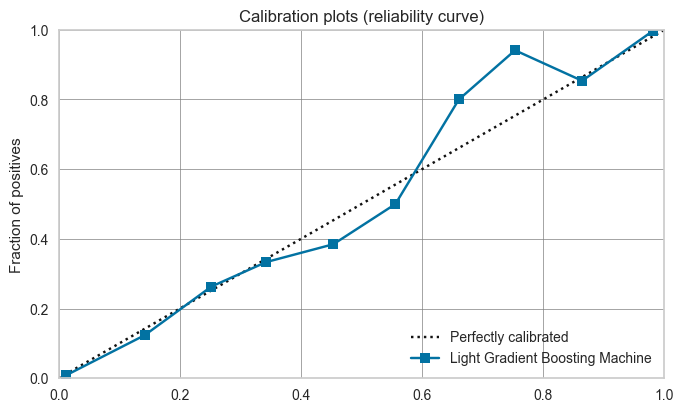

In [16]:
plot_model(tuned_lightgbm, plot='calibration')

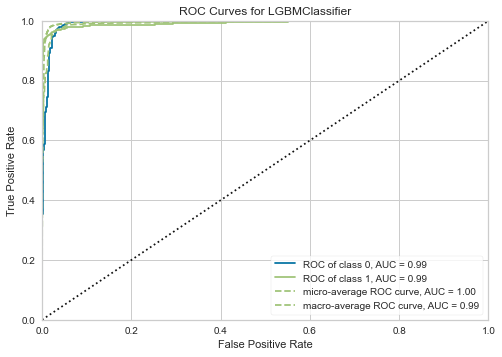

In [17]:
plot_model(tuned_lightgbm, plot = 'auc')

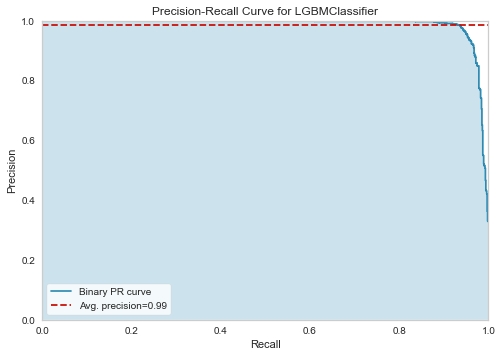

In [18]:
plot_model(tuned_lightgbm, plot = 'pr')

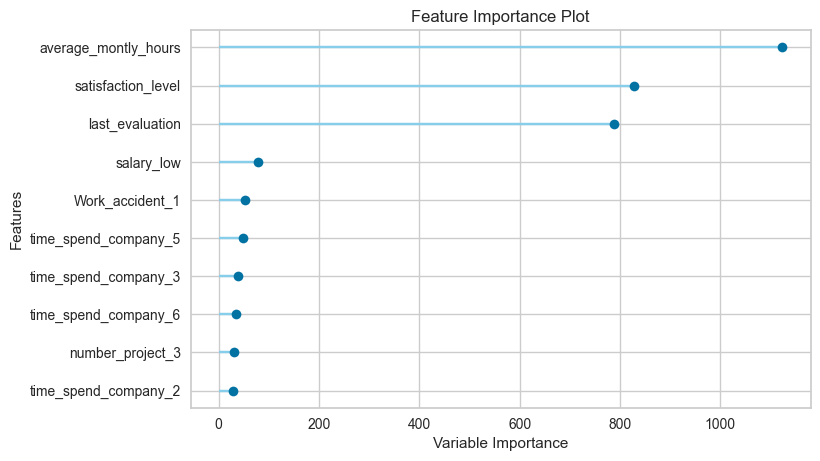

In [19]:
plot_model(tuned_lightgbm, plot='feature')

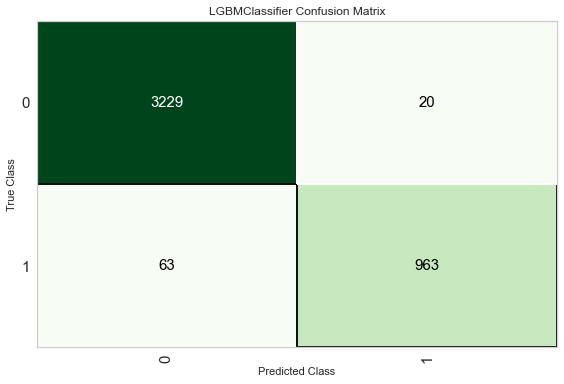

In [20]:
plot_model(tuned_lightgbm, plot = 'confusion_matrix')

In [21]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [22]:
predict_model(tuned_lightgbm);

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9806,0.9927,0.9386,0.9797,0.9587,0.9460,0.9464


In [23]:
final_lightgbm = finalize_model(tuned_lightgbm)

In [24]:
print(final_lightgbm)

LGBMClassifier(bagging_fraction=0.7, bagging_freq=6, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.5,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=66, min_child_weight=0.001, min_split_gain=0.4,
               n_estimators=90, n_jobs=-1, num_leaves=90, objective=None,
               random_state=123, reg_alpha=0.0005, reg_lambda=0.1, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)


In [25]:
predict_model(final_lightgbm)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.9916,0.9992,0.9727,0.9920,0.9823,0.9768,0.9768


,satisfaction_level,last_evaluation,average_montly_hours,number_project_2,number_project_3,number_project_4,number_project_5,number_project_6,number_project_7,time_spend_company_10,...,dept_product_mng,dept_sales,dept_support,dept_technical,salary_high,salary_low,salary_medium,left,Label,Score
0,0.77,0.52,216.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9909
1,0.58,0.48,135.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9944
2,0.64,0.95,218.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.9953
3,0.17,0.56,218.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9351
4,0.94,0.58,216.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9992
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4270,0.63,0.60,258.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0,0,0.9987
4271,0.40,0.36,128.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0,0,0.9784
4272,0.78,0.49,224.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0,0,0.9975
4273,0.86,0.64,137.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0,0,0.9947


In [26]:
unseen_predictions = predict_model(final_lightgbm, data=data_unseen)
unseen_predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,Label,Score
0,0.41,0.50,2,153,3,0,1,0,sales,low,1,0.9931
1,0.45,0.51,2,160,3,1,1,1,sales,low,1,0.9217
2,0.45,0.50,2,126,3,0,1,0,technical,low,1,0.9770
3,0.41,0.54,2,152,3,0,1,0,technical,low,1,0.9932
4,0.10,0.81,6,309,4,0,1,0,technical,low,1,0.9998


In [27]:
from pycaret.utils import check_metric
check_metric(unseen_predictions['left'], unseen_predictions['Label'], metric = 'Accuracy')

0.9853

In [28]:
save_model(final_lightgbm,'../model/Final LIGHTGBM Employees Churn Model 11Apr2021')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='left',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_strateg...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.5,
                                 importance_type='split', learning_rate=0.1,
                                 max_depth=-1,

In [29]:
#load the model
model = load_model('../model/Final LIGHTGBM Employees Churn Model 11Apr2021')

Transformation Pipeline and Model Successfully Loaded


In [30]:
predictions = predict_model(estimator=model,data=data_unseen)

In [31]:
predictions.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,dept,salary,Label,Score
0,0.41,0.50,2,153,3,0,1,0,sales,low,1,0.9931
1,0.45,0.51,2,160,3,1,1,1,sales,low,1,0.9217
2,0.45,0.50,2,126,3,0,1,0,technical,low,1,0.9770
3,0.41,0.54,2,152,3,0,1,0,technical,low,1,0.9932
4,0.10,0.81,6,309,4,0,1,0,technical,low,1,0.9998


In [32]:
plot_model(model, plot = 'confusion_matrix')

IntProgress(value=0, description='Processing: ', max=5)

Finished loading model, total used 90 iterations


Text(value="Following data types have been inferred automatically, if they are correct press enter to continue…

,Data Type
satisfaction_level,Numeric
last_evaluation,Numeric
average_montly_hours,Numeric
number_project_2,Categorical
number_project_3,Categorical
number_project_4,Categorical
number_project_5,Categorical
number_project_6,Categorical
number_project_7,Categorical
time_spend_company_10,Categorical


KeyError: 'left'

<Figure size 576x396 with 0 Axes>